In [3]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles
import os
os.chdir("/Users/M/Google_Drive/Scripts/hs/worm/EMBO/writeup/Figures/fig4_J2_Enrichment/fig4.5_J2_Enrichment_GOTERM/")

In [4]:

HSPATH = "../../data/Dogcatcher_Out/HS/N2_vs_HS_2ndtime/initial_Rsubread"
OKPATH = "../../data/Dogcatcher_Out/OK/N2_vs_OK_2ndtime/initial_Rsubread"


p = os.listdir(HSPATH)
print(p)
f1 = HSPATH + "/DESeq2_sense.csv"



p = os.listdir(OKPATH)
print(p)
f3 = OKPATH + "/DESeq2_sense.csv"



['DESeq2_initial.R.out', 'DESeq2_initial.R', 'Rsubread_antisense_normalized_rRNA_star.txt', 'DESeq2_sense.csv', 'Rsubread_initial.R', 'Rsubread_sense_normalized_rRNA_star.txt', 'col_data.txt', 'Rsubread_antisense.txt', 'Rsubread_sense.txt', 'Rsubread_initial.R.out', 'DESeq2_antisense.csv']
['DESeq2_initial.R.out', 'DESeq2_initial.R', 'Rsubread_antisense_normalized_rRNA_star.txt', 'DESeq2_sense.csv', 'Rsubread_initial.R', 'Rsubread_sense_normalized_rRNA_star.txt', 'col_data.txt', 'Rsubread_antisense.txt', 'Rsubread_sense.txt', 'Rsubread_initial.R.out', 'DESeq2_antisense.csv']


In [5]:
def get_above_20BM(f1):
    """This function will take in a DSeq2 normalized matrix and filter for everything LT 0.05
    Give back two df of above 2lfc and below 2lfc"""
    df = pd.read_csv(f1, index_col=None, sep=',')
    df.rename(columns={"Unnamed: 0" : "gene_id"}, inplace=True)
    # print("Length of df : ", len(df))
    # df = df[df["baseMean"] > 20]   
    # print("Length of df > 20 BM : ", len(df))
    #df = df.dropna()
    #print("Length of df drop NA > 20 BM : ", len(df))
    return df

In [6]:
df_hs = get_above_20BM(f1)
df_ok = get_above_20BM(f3)

In [7]:
df_merge  = pd.merge(df_hs, df_ok, how="inner", on="gene_id")

Merged Population above 20 Basemean is :  46760


In [8]:
#Get seperate out for hs and tdp-1 only in population
df_HS = df_hs[df_hs["gene_id"].isin(df_merge["gene_id"])]
df_OK = df_ok[df_ok["gene_id"].isin(df_merge["gene_id"])]
print(len(df_HS))

46760


In [11]:
def get_above_below_2lfc_p05(df):
    """This function will take in a DSeq2 normalized matrix and filter for everything LT 0.05
    Give back two df of above 2lfc and below 2lfc"""
    df_padj_less_05 = df[df["padj"] < 0.05]
    df_above_2_lfc = df_padj_less_05[df_padj_less_05['log2FoldChange'] > 0].sort_values(by='padj', ascending=True)
    df_below_2_lfc = df_padj_less_05[df_padj_less_05['log2FoldChange'] < -0].sort_values(by='padj', ascending=True)
    return df_above_2_lfc,df_below_2_lfc

In [12]:
df_HS_sense_above_2_lfc, df_HS_sense_below_2_lfc = get_above_below_2lfc_p05(df_HS)
df_OK_sense_above_2_lfc, df_OK_sense_below_2_lfc = get_above_below_2lfc_p05(df_OK)

In [13]:
df_HS_sense_above_2_lfc.to_csv("df_HS_sense_above.csv",sep="\t",index=None)
df_HS_sense_below_2_lfc.to_csv("df_HS_sense_below.csv",sep="\t",index=None)
df_OK_sense_above_2_lfc.to_csv("df_OK_sense_above.csv",sep="\t",index=None)
df_OK_sense_below_2_lfc.to_csv("df_OK_sense_below.csv",sep="\t",index=None)

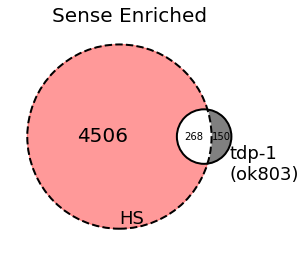

In [15]:

#MAKE NEW DATAFRAMES
df_concat  = pd.merge(df_HS_sense_above_2_lfc, df_OK_sense_above_2_lfc, how="inner", on="gene_id")
df_HS_only = df_HS_sense_above_2_lfc[~df_HS_sense_above_2_lfc.gene_id.isin(df_concat.gene_id)]
df_OK_only = df_OK_sense_above_2_lfc[~df_OK_sense_above_2_lfc.gene_id.isin(df_concat.gene_id)]


df_concat.to_csv("df_HS_OK____sense.csv",sep="\t",index=None)
df_HS_only.to_csv("df_HS_only_sense.csv",sep="\t",index=None)
df_OK_only.to_csv("df_OK_only_sense.csv",sep="\t",index=None)

df_concat_GO =  df_concat["gene_id"]
df_HS_only_GO =  df_HS_only["gene_id"]
df_OK_only_GO =  df_OK_only["gene_id"]
          
df_concat_GO.to_csv("df_HS_OK____sense_above_GO.csv",sep="\t",index=None)
df_HS_only_GO.to_csv("df_HS_only_sense_above_GO.csv",sep="\t",index=None)
df_OK_only_GO.to_csv("df_OK_only_sense_above_GO.csv",sep="\t",index=None)


# Subset sizes
s = (
    len(df_HS_only),  # Ab
    len(df_OK_only),  # aB
    len(df_concat),  # AB
)

v = venn2(subsets=s, set_labels=('HS', 'tdp-1\n(ok803)'))

for text in v.set_labels:
    text.set_x(text.get_position()[0] + 0.15)    #Move along x
    text.set_y(text.get_position()[1] + 0.15)    #Move along y
    text.set_fontsize(18)
#label.set_family('serif')
#label.set_x(label.get_position()[0] + 0.1)

#v.get_label_by_id('A').set_text('$x^2$') # Those are set labels
#v.get_label_by_id('A').set_fontsize(22)


hs_label = "Heatshock\n" + str(len(df_HS_only))

# Subset labels
v.get_label_by_id('10').set_text(str(len(df_HS_only)))
v.get_label_by_id('10').set_fontsize(20)
v.get_label_by_id('01').set_text(str(len(df_OK_only)))
v.get_label_by_id('11').set_text(str(len(df_concat)))

#v.get_label_by_id('tdp-1(ok803)').set_fontsize(20)




# Subset colors
v.get_patch_by_id('10').set_color('red')
v.get_patch_by_id('01').set_color('grey')
v.get_patch_by_id('11').set_color('white')

# Subset alphas
v.get_patch_by_id('10').set_alpha(0.4)
v.get_patch_by_id('01').set_alpha(1.0)
v.get_patch_by_id('11').set_alpha(0.7)

# Border styles
c = venn2_circles(subsets=s, linestyle='solid')
c[0].set_ls('dashed')  # Line style
c[0].set_lw(2.0)       # Line width
plt.title("Sense Enriched", fontsize=20)
plt.savefig('SenseVenn.png',bbox_inches='tight')
#savefig('foo.png', bbox_inches='tight')
#plt.show()

